# Data Preprocessing and Baseline Modeling

This notebook is focused on applying data preprocessing and exploring baseline models on a dataset of 2022 annual CDC survey data of 400k+ adults related to their health status.

The goal is to develop an efficient machine learning model to predict an individual's propensity to having a heart disease.

## Table of Contents

1. [Data Preprocessing](#datapreprocessing)
2. [Using a Logistic Regression Model](#logisticregression)
3. [Using a Decision Tree Classifier](#decisiontree)
4. [Using a Naives Bayes Classifier](#NaivesBayes)
5. [Using a Random Forest Classifier](#rfc)

In [1]:
#Importing required modules
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
#import imblearn

import statsmodels.api as sm

In [2]:
#Importing data

df = pd.read_csv('data/2022/cleaned_data.csv')
df.head()

,Sex,PhysicalHealthDays,MentalHealthDays,SleepHours,HadHeartAttack,HeightInMeters,WeightInKilograms,State_Alaska,State_Arizona,State_Arkansas,...,FluVaxLast12_Yes,PneumoVaxEver_No,PneumoVaxEver_Yes,"TetanusLast10Tdap_No, did not receive any tetanus shot in the past 10 years","TetanusLast10Tdap_Yes, received Tdap","TetanusLast10Tdap_Yes, received tetanus shot but not sure what type","TetanusLast10Tdap_Yes, received tetanus shot, but not Tdap",HighRiskLastYear_Yes,CovidPos_Tested positive using home test without a health professional,CovidPos_Yes
0,0,0.0,0.0,8.0,0,1.70,80.74,0,0,0,...,1,1,0,0,0,1,0,0,0,0
1,0,0.0,0.0,6.0,0,1.60,68.04,0,0,0,...,0,1,0,1,0,0,0,0,0,0
2,0,2.0,3.0,5.0,0,1.57,63.50,0,0,0,...,0,1,0,0,0,0,0,0,0,1
3,0,0.0,0.0,7.0,0,1.65,63.50,0,0,0,...,1,0,1,1,0,0,0,0,0,0
4,0,2.0,0.0,9.0,0,1.57,53.98,0,0,0,...,0,0,1,1,0,0,0,0,0,0


## Data Preprocessing<a name="datapreprocessing"></a>

### Train/Test Split 

In [3]:
from sklearn.model_selection import train_test_split

X = df.drop(columns = ['HadHeartAttack'])
y = df['HadHeartAttack']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.75, random_state=2)

### Dealing with class imbalance by upsampling 

From the preliminary EDA, there is a significant disparity between the number of people who reported having no heart attacks and the number of people who reported having a heart attack. This could potentially be a problem to some models as it could introduce some biases to the majority class (those who responded 'No')

In [4]:
from sklearn.utils import resample

# Upsample
print('Number of class 1 examples before:', X_train[y_train == 1].shape[0])

X_upsampled, y_upsampled = resample(X_train[y_train == 1],
                                    y_train[y_train == 1],
                                    replace=True,
                                    n_samples=X_train[y_train == 0].shape[0],
                                    random_state=123)

print('Number of class 1 examples after:', X_upsampled.shape[0])

#Combine upsample with original data
X_train_bal = np.vstack((X_train[y_train == 0], X_upsampled))
y_train_bal = np.hstack((y_train[y_train == 0], y_upsampled))

#Convert the X variable numpy array into a dataframe
X_train_bal = pd.DataFrame(X_train_bal, columns=X.columns)

Number of class 1 examples before: 6224
Number of class 1 examples after: 105019


## Using a Logistic Regression Model <a name="logisticregression"></a>

In [5]:
#Using stats models logistic regression implementation:

# adding the column of ones
X_withconstant = sm.add_constant(X_train_bal)
 

# 1. Instantiate model
logreg = sm.Logit(y_train_bal, X_withconstant)

# 2. Fit model
#logreg_results = logreg.fit(method='bfgs', maxiter=1000)
logreg_results = logreg.fit()

# Look at summary
logreg_results.summary()

Optimization terminated successfully.
         Current function value: 0.431480
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:               210038
Model:                          Logit   Df Residuals:                   209927
Method:                           MLE   Df Model:                          110
Date:                Fri, 02 Feb 2024   Pseudo R-squ.:                  0.3775
Time:                        22:29:39   Log-Likelihood:                -90627.
converged:                       True   LL-Null:                   -1.4559e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
===============================================================================================================================================
                                                                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------------
const                                                                          -1.9257      0.137    -14.021      0.000      -2.195      -1.657
Sex                                                                             0.7303      0.017     44.161      0.000       0.698       0.763
PhysicalHealthDays                                                              0.0067      0.001      9.263      0.000       0.005       0.008
MentalHealthDays                                                                0.0033      0.001      4.004      0.000       0.002       0.005
SleepHours                                                                     -0.0122      0.004     -3.398      0.001      -0.019      -0.005
HeightInMeters                                                                 -0.3249      0.082     -3.950      0.000      -0.486      -0.164
WeightInKilograms                                                              -0.0017      0.000     -4.838      0.000      -0.002      -0.001
State_Alaska                                                                    0.1451      0.055      2.621      0.009       0.037       0.254
State_Arizona                                                                   0.2324      0.042      5.533      0.000       0.150       0.315
State_Arkansas                                                                  0.1031      0.054      1.902      0.057      -0.003       0.209
State_California                                                               -0.1001      0.048     -2.090      0.037      -0.194      -0.006
State_Colorado                                                                  0.0916      0.050      1.845      0.065      -0.006       0.189
State_Connecticut                                                               0.1037      0.047      2.200      0.028       0.011       0.196
State_Delaware                                                                 -0.2949      0.069     -4.288      0.000      -0.430      -0.160
State_District of Columbia                                                      0.1901      0.084      2.269      0.023       0.026       0.354
State_Florida                                                                   0.1702      0.039      4.352      0.000       0.094       0.247
State_Georgia                                                                  -0.0143      0.047     -0.305      0.760      -0.106       0.077
State_Guam                                                                      0.3962      0.082      4.849      0.000       0.236       0.556
State_Hawaii                                                                   -0.0012      0.053     -0.023      0.982      -0.106       0.103
State_Idaho                                                              

From the results above; 
Notably the sex, Number of days where an individual's physical health was not good, the number of days where an individual's mental health was not good, the average number of sleep hours in a day, an individual's height and weight, are all significant in determining the odds ratio of an individual having a heart attack.

### Model Evaluation for the Logistic Regression Model

Finding the threshold that maximizes the True Postive Rate/the recall and minimizes the false positive rate

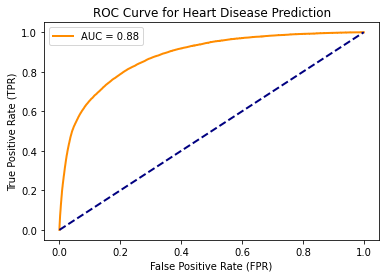

Area under curve (AUC):0.8783540036790753



In [6]:
from sklearn.metrics import roc_curve, roc_auc_score

# getting probabiistic  predictions

Xtest_withconstant = sm.add_constant(X_test)

model_predictions_prob_test = logreg_results.predict(Xtest_withconstant)

fprs, tprs, thresholds = roc_curve(y_test, model_predictions_prob_test)
roc_auc = roc_auc_score(y_test, model_predictions_prob_test)

plt.figure()
plt.plot(fprs, tprs, color='darkorange',
         lw=2, label='AUC = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for Heart Disease Prediction')
plt.legend(loc="best")
plt.show()

print(f'Area under curve (AUC):{roc_auc}')
print()

In [7]:
# Specify the desired FPR 
desired_fpr = 0.2

# Find the index of the point on the ROC curve closest to the desired FPR or TPR
index_at_desired_fpr = np.argmin(np.abs(fprs - desired_fpr))

# Get the corresponding threshold values
threshold_at_desired_fpr = thresholds[index_at_desired_fpr]
tpr_at_desired_fpr = tprs[index_at_desired_fpr]


print(f"Threshold at desired FPR ({desired_fpr}): {threshold_at_desired_fpr}")
print(f"TPR at desired FPR ({desired_fpr}): {tpr_at_desired_fpr}")

Threshold at desired FPR (0.2): 0.44792443748279154
TPR at desired FPR (0.2): 0.7877568311798347


### Testing to determine if the above model violates the most critical assumption of a logistic regression

Assumption: The relationship between the logit(log-odds) of the outcome and each continuous independent variable is linear

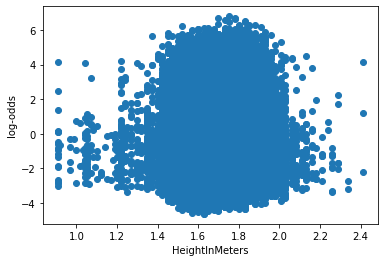

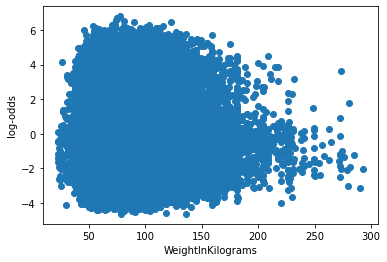

In [8]:
#Defining the continuous independent variables and making predictions on the test set

cont_vars = ['HeightInMeters','WeightInKilograms']

predicted = logreg_results.predict(Xtest_withconstant)


#Getting log odds values
log_odds = np.log(predicted/(1-predicted))


#Visualizing the predictor variables vs logit values 
for var in cont_vars:
    plt.scatter(x=Xtest_withconstant[var], y=log_odds)
    plt.xlabel(f'{var}')
    plt.ylabel('log-odds')
    plt.show()

The model does violate the most critical assumption of a logistic regression so the model coeficients need to be taken with a grain of salt.

### Applying Regularization With the Logistic Regression Model:

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score
#from sklearn.metrics import make_scorer, f1_score


estimators = [('normalise', StandardScaler()),
              ('logit',LogisticRegression())]
pipe = Pipeline(estimators)

params = {'logit__C': [0.0001,0.001,0.01,0.1,1,10],
         'logit__penalty': ['l2']}

#f1_scorer = make_scorer(f1_score)

grid_search = GridSearchCV(pipe, param_grid=params, scoring='roc_auc')

fitted_search = grid_search.fit(X_train_bal, y_train_bal)

auc_trainscore = fitted_search.best_score_
print(f"AUC score on the train set: {auc_trainscore}")

AUC score on the train set: 0.8841690394126743


In [10]:
fitted_search.best_estimator_

Pipeline(steps=[('normalise', StandardScaler()),
                ('logit', LogisticRegression(C=0.01))])

### Logistic Regression Model Evaluation after Regularization

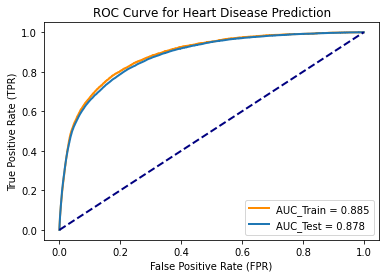

AUC_Train:0.8845226164578384
AUC_Test:0.8783956451335523


In [11]:
bestlog_model = fitted_search.best_estimator_

y_proba_train = bestlog_model.predict_proba(X_train_bal)[:,1]
y_proba_test = bestlog_model.predict_proba(X_test)[:,1]

fprs_train, tprs_train, thresholds_train = roc_curve(y_train_bal, y_proba_train)
fprs_test, tprs_test, thresholds_test = roc_curve(y_test, y_proba_test)
roc_auc_train = roc_auc_score(y_train_bal, y_proba_train)
roc_auc_test = roc_auc_score(y_test, y_proba_test)

plt.figure()
plt.plot(fprs_train, tprs_train, color='darkorange',
         lw=2, label='AUC_Train = %0.3f' % roc_auc_train)
plt.plot(fprs_test, tprs_test, lw=2, label='AUC_Test = %0.3f' % roc_auc_test)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for Heart Disease Prediction')
plt.legend(loc="best")
plt.show()

print(f'AUC_Train:{roc_auc_train}')
print(f'AUC_Test:{roc_auc_test}')

With a Test AUC Score of 0.878, the model doesn't improve after regularization. However it is doing well in distinguishing between individuals who have had a heart attack and individuals who haven't.

In [12]:
# Specify the desired FPR 
desired_fpr = 0.2

# Find the index of the point on the ROC curve closest to the desired FPR or TPR
index_at_desired_fpr = np.argmin(np.abs(fprs_test - desired_fpr))

# Get the corresponding threshold values
threshold_at_desired_fpr = thresholds_test[index_at_desired_fpr]
tpr_at_desired_fpr = tprs_test[index_at_desired_fpr]


print(f"Threshold at desired FPR ({desired_fpr}): {threshold_at_desired_fpr}")
print(f"TPR at desired FPR ({desired_fpr}): {tpr_at_desired_fpr}")

Threshold at desired FPR (0.2): 0.44781982525143343
TPR at desired FPR (0.2): 0.7878097860622749


## Using a Decision Tree Classifier <a name="decisiontree"></a>

In [13]:
from sklearn.tree import DecisionTreeClassifier
from tempfile import mkdtemp
cachedir = mkdtemp()

estimators = [('dt', DecisionTreeClassifier())]

pipe = Pipeline(estimators, memory = cachedir)

params = {'dt__max_depth': [1,2,5,7,10,20],
         'dt__min_samples_split': [2,4,7,11,20]}

grid_search = GridSearchCV(pipe, param_grid=params, scoring='roc_auc')

fitted_search_dt = grid_search.fit(X_train_bal, y_train_bal)

#Evaluating on the AUC score
auc_trainscore = fitted_search_dt.best_score_
print(f"AUC score on the train set: {auc_trainscore}")

AUC score on the train set: 0.9568849090816857


In [14]:
fitted_search_dt.best_estimator_

Pipeline(memory='C:\\Users\\ROLAND~1.TET\\AppData\\Local\\Temp\\tmpp6q18b2v',
         steps=[('dt',
                 DecisionTreeClassifier(max_depth=20, min_samples_split=4))])

In [15]:
fitted_search_dt.best_params_

{'dt__max_depth': 20, 'dt__min_samples_split': 4}

The best model uses a maximum depth of 20 and a minimum samples split of 2

### Model Evaluation 

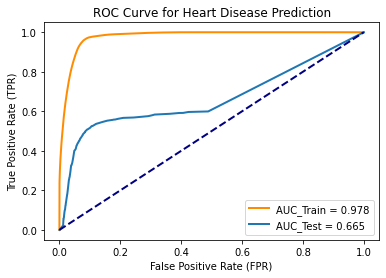

AUC_Train:0.977945405196823
AUC_Test:0.6647926493659494


In [16]:
bestdt_model = fitted_search_dt.best_estimator_

y_proba_train = bestdt_model.predict_proba(X_train_bal)[:,1]
y_proba_test = bestdt_model.predict_proba(X_test)[:,1]

fprs_train, tprs_train, thresholds_train = roc_curve(y_train_bal, y_proba_train)
fprs_test, tprs_test, thresholds_test = roc_curve(y_test, y_proba_test)
roc_auc_train = roc_auc_score(y_train_bal, y_proba_train)
roc_auc_test = roc_auc_score(y_test, y_proba_test)

plt.figure()
plt.plot(fprs_train, tprs_train, color='darkorange',
         lw=2, label='AUC_Train = %0.3f' % roc_auc_train)
plt.plot(fprs_test, tprs_test, lw=2, label='AUC_Test = %0.3f' % roc_auc_test)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for Heart Disease Prediction')
plt.legend(loc="best")
plt.show()

print(f'AUC_Train:{roc_auc_train}')
print(f'AUC_Test:{roc_auc_test}')

With a Test AUC Score of 0.665, it is barely doing distinguishing between individuals who have had a heart attack and individuals who haven't.

In [17]:
# Specify the desired FPR 
desired_fpr = 0.2

# Find the index of the point on the ROC curve closest to the desired FPR or TPR
index_at_desired_fpr = np.argmin(np.abs(fprs_test - desired_fpr))

# Get the corresponding threshold values
threshold_at_desired_fpr = thresholds_test[index_at_desired_fpr]
tpr_at_desired_fpr = tprs_test[index_at_desired_fpr]


print(f"Threshold at desired FPR ({desired_fpr}): {threshold_at_desired_fpr}")
print(f"TPR at desired FPR ({desired_fpr}): {tpr_at_desired_fpr}")

Threshold at desired FPR (0.2): 0.08531468531468532
TPR at desired FPR (0.2): 0.5652933700487185


## Using a Naives Bayes Classification <a name="NaivesBayes"></a>

In [18]:
from sklearn.naive_bayes import GaussianNB


estimators = [('normalise', StandardScaler()),
              ('GNB', GaussianNB())]
pipe = Pipeline(estimators, memory = cachedir)

params = {'GNB__var_smoothing': [0.00000000001,0.0000000001,0.000000001]}


grid_search = GridSearchCV(pipe, param_grid=params, scoring='roc_auc', verbose=5)

fitted_search_GNB = grid_search.fit(X_train_bal, y_train_bal)

#Evaluating on the AUC score
auc_trainscore = fitted_search_GNB.best_score_
print(f"AUC score on the train set: {auc_trainscore}")

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV 1/5] END .......................GNB__var_smoothing=1e-11; total time=   2.1s
[CV 2/5] END .......................GNB__var_smoothing=1e-11; total time=   2.1s
[CV 3/5] END .......................GNB__var_smoothing=1e-11; total time=   2.1s
[CV 4/5] END .......................GNB__var_smoothing=1e-11; total time=   2.3s
[CV 5/5] END .......................GNB__var_smoothing=1e-11; total time=   2.0s
[CV 1/5] END .......................GNB__var_smoothing=1e-10; total time=   0.9s
[CV 2/5] END .......................GNB__var_smoothing=1e-10; total time=   0.9s
[CV 3/5] END .......................GNB__var_smoothing=1e-10; total time=   0.8s
[CV 4/5] END .......................GNB__var_smoothing=1e-10; total time=   0.9s
[CV 5/5] END .......................GNB__var_smoothing=1e-10; total time=   0.9s
[CV 1/5] END .......................GNB__var_smoothing=1e-09; total time=   1.1s
[CV 2/5] END .......................GNB__var_smoo

In [19]:
fitted_search_GNB.best_estimator_

Pipeline(memory='C:\\Users\\ROLAND~1.TET\\AppData\\Local\\Temp\\tmpp6q18b2v',
         steps=[('normalise', StandardScaler()),
                ('GNB', GaussianNB(var_smoothing=1e-11))])

In [20]:
fitted_search_GNB.best_params_

{'GNB__var_smoothing': 1e-11}

### Model Evaluation 

The train AUC Score was 0.88, however since LinearSVC doesn't return predicted probabilities,and the dataset is too large to run it using the SVC model, going with the F score to assess the performance:

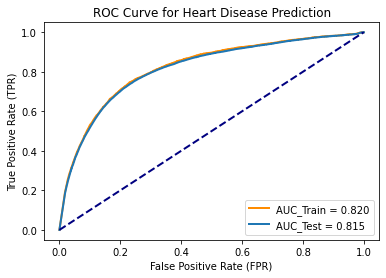

AUC_Train:0.8197110391871164
AUC_Test:0.8153374402782867


In [21]:
bestgnb_model = fitted_search_GNB.best_estimator_

y_proba_train = bestgnb_model.predict_proba(X_train_bal)[:,1]
y_proba_test = bestgnb_model.predict_proba(X_test)[:,1]

fprs_train, tprs_train, thresholds_train = roc_curve(y_train_bal, y_proba_train)
fprs_test, tprs_test, thresholds_test = roc_curve(y_test, y_proba_test)
roc_auc_train = roc_auc_score(y_train_bal, y_proba_train)
roc_auc_test = roc_auc_score(y_test, y_proba_test)

plt.figure()
plt.plot(fprs_train, tprs_train, color='darkorange',
         lw=2, label='AUC_Train = %0.3f' % roc_auc_train)
plt.plot(fprs_test, tprs_test, lw=2, label='AUC_Test = %0.3f' % roc_auc_test)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for Heart Disease Prediction')
plt.legend(loc="best")
plt.show()

print(f'AUC_Train:{roc_auc_train}')
print(f'AUC_Test:{roc_auc_test}')

In [22]:
# Specify the desired FPR 
desired_fpr = 0.2

# Find the index of the point on the ROC curve closest to the desired FPR or TPR
index_at_desired_fpr = np.argmin(np.abs(fprs_test - desired_fpr))

# Get the corresponding threshold values
threshold_at_desired_fpr = thresholds_test[index_at_desired_fpr]
tpr_at_desired_fpr = tprs_test[index_at_desired_fpr]


print(f"Threshold at desired FPR ({desired_fpr}): {threshold_at_desired_fpr}")
print(f"TPR at desired FPR ({desired_fpr}): {tpr_at_desired_fpr}")

Threshold at desired FPR (0.2): 0.986477727067339
TPR at desired FPR (0.2): 0.7014933276848125


## Using a Random Forest Classifier <a name="rfc"></a>

In [23]:

from sklearn.ensemble import RandomForestClassifier


estimators = [('normalise', StandardScaler()),
              ('rfc', RandomForestClassifier())]

pipe = Pipeline(estimators, memory = cachedir)

params = {'rfc__n_estimators': [10,20,30],
         'rfc__max_depth': [1,2,5,7,10,20,30],
         'rfc__min_samples_split': [2,4,7,11,20]}


grid_search = GridSearchCV(pipe, param_grid=params, scoring='roc_auc')

fitted_search_rfc = grid_search.fit(X_train_bal, y_train_bal)

#Evaluating on the AUC score
auc_trainscore = fitted_search_rfc.best_score_
print(f"AUC score on the train set: {auc_trainscore}")

AUC score on the train set: 0.9998378402503582


In [24]:
fitted_search_rfc.best_estimator_

Pipeline(memory='C:\\Users\\ROLAND~1.TET\\AppData\\Local\\Temp\\tmpp6q18b2v',
         steps=[('normalise', StandardScaler()),
                ('rfc',
                 RandomForestClassifier(max_depth=30, min_samples_split=4,
                                        n_estimators=30))])

In [25]:
fitted_search_rfc.best_params_

{'rfc__max_depth': 30, 'rfc__min_samples_split': 4, 'rfc__n_estimators': 30}

### Model Evaluation

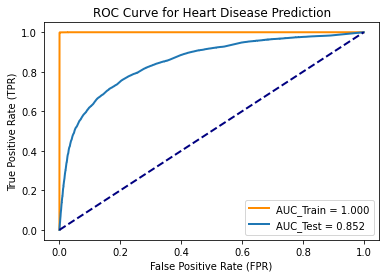

AUC_Train:0.9999889604582093
AUC_Test:0.8524140670124204


In [26]:
bestrfc_model = fitted_search_rfc.best_estimator_

y_proba_train = bestrfc_model.predict_proba(X_train_bal)[:,1]
y_proba_test = bestrfc_model.predict_proba(X_test)[:,1]

fprs_train, tprs_train, thresholds_train = roc_curve(y_train_bal, y_proba_train)
fprs_test, tprs_test, thresholds_test = roc_curve(y_test, y_proba_test)
roc_auc_train = roc_auc_score(y_train_bal, y_proba_train)
roc_auc_test = roc_auc_score(y_test, y_proba_test)

plt.figure()
plt.plot(fprs_train, tprs_train, color='darkorange',
         lw=2, label='AUC_Train = %0.3f' % roc_auc_train)
plt.plot(fprs_test, tprs_test, lw=2, label='AUC_Test = %0.3f' % roc_auc_test)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for Heart Disease Prediction')
plt.legend(loc="best")
plt.show()

print(f'AUC_Train:{roc_auc_train}')
print(f'AUC_Test:{roc_auc_test}')

With a Test AUC Score of 0.85, it is doing well in distinguishing between individuals who have had a heart attack and individuals who haven't.

In [27]:
# Specify the desired FPR 
desired_fpr = 0.2

# Find the index of the point on the ROC curve closest to the desired FPR or TPR
index_at_desired_fpr = np.argmin(np.abs(fprs_test - desired_fpr))

# Get the corresponding threshold values
threshold_at_desired_fpr = thresholds_test[index_at_desired_fpr]
tpr_at_desired_fpr = tprs_test[index_at_desired_fpr]


print(f"Threshold at desired FPR ({desired_fpr}): {threshold_at_desired_fpr}")
print(f"TPR at desired FPR ({desired_fpr}): {tpr_at_desired_fpr}")

Threshold at desired FPR (0.2): 0.13333333333333333
TPR at desired FPR (0.2): 0.753918661300572


In [28]:
# Get feature names and importances
feature_names = X.columns.tolist()
importances = bestrfc_model.named_steps['rfc'].feature_importances_


feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})


feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)


print(feature_importance_df)

                                              Feature  Importance
68                                      HadAngina_Yes    0.153560
5                                   WeightInKilograms    0.054050
97                                  AgeCategory_older    0.044566
4                                      HeightInMeters    0.043154
91                                      ChestScan_Yes    0.036043
..                                                ...         ...
19                                     State_Illinois    0.000899
16                                         State_Guam    0.000883
13                         State_District of Columbia    0.000733
78  HadDiabetes_Yes, but only during pregnancy (fe...    0.000596
53                               State_Virgin Islands    0.000351

[110 rows x 2 columns]


Next Steps, applying ensemble learning methods based on the best models derived from this step.